In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt

# nb max de clients est 130
n_clients=50
def data_prep(n_clients):
    n_depot = n_clients+1
    #on importe les donnée sur les clients et le depot
    df=pd.read_excel("2_detail_table_customers.xls")
    df_depot=pd.read_excel('4_detail_table_depots.xls')
    #on extrait les informations qui nous intéressent
    Columns=["CUSTOMER_NUMBER","CUSTOMER_LATITUDE","CUSTOMER_LONGITUDE"]
    Data =( df[Columns]
           .rename(columns={"CUSTOMER_NUMBER":"number","CUSTOMER_LATITUDE":"x","CUSTOMER_LONGITUDE":"y"})
          )
    Data=Data.head(n_clients)
    depot = df_depot[['DEPOT_CODE','DEPOT_LATITUDE','DEPOT_LONGITUDE']].drop_duplicates()
    depot = depot.rename(columns={"DEPOT_CODE":"number of client/depot","DEPOT_LATITUDE":"x","DEPOT_LONGITUDE":"y"})
    Data.loc[len(Data)]=depot.iloc[0]
    return Data
def client_distances(Data):
    #définition d'une matrice U qui contient les distances entre les clienst/depot
    U=np.zeros((len(Data),len(Data)))
    for i in range(len(Data)):
        for j in range(i+1,len(Data)):
            U[i,j]=np.sqrt((Data.iloc[i,1]-Data.iloc[j,1])**2+(Data.iloc[i,2]-Data.iloc[j,2])**2)
            U[j,i]=U[i,j]
    return U
Data=data_prep(n_clients)
U=client_distances(Data)

In [128]:
nbmax = 200  # Nombre maximal d'itérations
f_limite = 0  # Borne inférieure de la fonction objectif
taille_max_T = 5  # Taille maximale de la liste taboue
def fonction_objectif( L,M=U):
    if L==None:
        return 100
    time=0
    V=30
    for i in range(len(L)-1):
        time+=U[L[i]-1,L[i+1]-1]
    return time
def generer_voisins(solution,n_voisins=100):
    voisins = []
    n=len(solution)
    # Exemple : génération de voisins en inversant deux éléments de la solution
    """for i in range(1,len(solution)-1):
            voisin = solution[:]
            voisin[i], voisin[i+1] = voisin[i+1], voisin[i]
            voisins.append(voisin)
    """
    for i in range(n_voisins):
            voisin = solution[1:len(solution)-1]
            random.shuffle(voisin)
            voisin=[solution[0]]+voisin+[solution[0]]
            voisins.append(voisin)
    
    return voisins
def generer_voisins2(solution):
    voisins = []
    n=len(solution)
    
    for i in range(1,n-2):
        for j in range(i+1,n-1):
            voisin=solution[:]
            voisin[i],voisin[j]=voisin[j],voisin[i]
            voisins.append(voisin)
    return voisins
def fonction_aspiration(solution,T,A):
    # Vérifier si la solution est taboue et satisfait l'aspiration
    sol=T[0]
    for s in T[1:]:
        if (solution!=s)  and (fonction_objectif(s)<fonction_objectif(sol)):
            sol=s[:]
    
    T.remove(sol)
    return sol
def initialiser_solution(n=n_clients+1):
    L=[n]
    aux=[i for i in range(1,n-1)]
    random.shuffle(aux)
    L.extend(aux)
    L.append(n)
    return L
def tabou( sol, nbmax):
    # Initialisation
    solution=sol
    if sol==None:
        solution = initialiser_solution()
    #print(solution)
    meilleure_solution = solution[:]
    nb_iter = 0
    T = []  # Liste taboue initialement vide
    meilleure_iteration = 0
    compt=100
    # Initialisation de la fonction d'aspiration
    A = fonction_objectif(meilleure_solution)
    history=[A]
    T.append(solution)
    # Processus itératif
    while (fonction_objectif(solution) > 3) and (nb_iter-meilleure_iteration < nbmax)  :
    
        nb_iter += 1
        
        if(nb_iter-meilleure_iteration>=100) :    
            if compt==100:
                #print('yes')
                solution=initialiser_solution()
            compt-=1
        
        if compt ==0:
            compt =100
        #aspiration
        """
        if (nb_iter-meilleure_iteration) >=100:
            print('yes')
            L=solution[1:-1]
            random.shuffle(L)
            solution=[solution[0]]+L+[solution[0]]
        """   
        voisins = generer_voisins2(solution)
        
        meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))
        #print(meilleure_voisin)
        while meilleure_voisin in T:
            #print(fonction_objectif(meilleure_voisin))
            voisins.remove(meilleure_voisin)
            meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))
            #print(fonction_objectif(meilleure_voisin))
        #print('i"m out')
        # Mettre à jour la meilleure solution trouvée
        if (fonction_objectif(meilleure_voisin) < A) and (meilleure_voisin not in T):
            meilleure_solution = meilleure_voisin[:]
            meilleure_iteration = nb_iter
        T.append(meilleure_voisin)
        
            
        
        if len(T) > taille_max_T:
            T.pop(0)  # Supprimer le plus ancien élément de T
        # Mettre à jour la fonction d'aspiration
        A = fonction_objectif(meilleure_solution)
        # Mettre à jour la solution courante
        solution = meilleure_voisin[:]
        #print(fonction_objectif(solution))
        history.append(A)
    #print(A)
    return A,meilleure_solution,history


In [132]:
A,best_solution,history=tabou(None,400)
A

4.149587345220883

In [146]:
solution =best_solution[:]

In [11]:
nbmax = 300  # Nombre maximal d'itérations
taille_max_T = 10  # Taille maximale de la liste taboue

DEPOT = (Data.iloc[-1]['x'], Data.iloc[-1]['y'])
client_positions = list(zip(Data['x'], Data['y']))


In [ ]:
nb_iter=100
A,best_solution=tabou(None,nbmax)
for i in range(nb_iter):
    A_aux,best_solution_aux=tabou(best_solution,nbmax)
    if A>A_aux:
        best_solution=best_solution_aux[:]
        A=A_aux
A

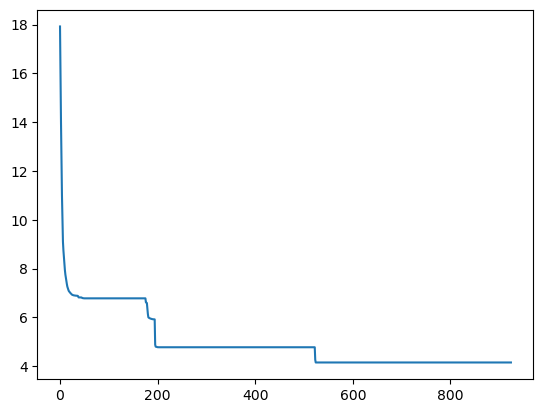

In [133]:
plt.plot(range(len(history)),history)

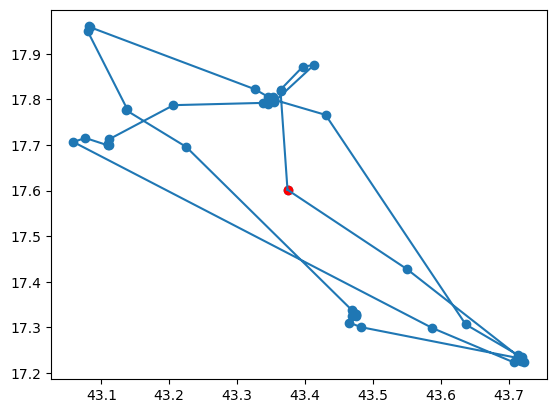

In [134]:
#new_cities_order = np.concatenate((np.array([Data.loc[best_solution[i]-1,['x','y']] for i in range(len(best_solution))]),np.array([Data.loc[n_clients,['x','y']]])))
# Plot the cities.
plt.scatter(Data['x'],Data['y'])
plt.scatter(*DEPOT, color='red', label='Dépôt')
# Plot the path.
X=[Data.loc[i-1,'x'] for i in best_solution]
Y=[Data.loc[i-1,'y'] for i in best_solution]
plt.plot(X,Y)
plt.show()

## V3

In [25]:
nbmax = 200  # Nombre maximal d'itérations
f_limite = 0  # Borne inférieure de la fonction objectif
taille_max_T = 10  # Taille maximale de la liste taboue
def fonction_objectif( L,M=U):
    if L==None:
        return 100
    time=0
    V=30
    for i in range(len(L)-1):
        time+=U[L[i]-1,L[i+1]-1]
    return time
def generer_voisins(solution,n_voisins=100):
    voisins = []
    n=len(solution)
    
    for k in range(n_voisins):
        voisin = solution[:]
        l=random.sample(range(1,n-2),4)
        voisin[l[0]], voisin[l[1]], voisin[l[2]], voisin[l[3]]= voisin[l[3]], voisin[l[1]],voisin[l[0]], voisin[l[2]]
        voisins.append(voisin)
    return voisins
def generer_voisins2(solution):
    voisins = []
    n=len(solution)
    
    for i in range(1,n-2):
        for j in range(i+1,n-1):
            voisin=solution[:]
            voisin[i],voisin[j]=voisin[j],voisin[i]
            voisins.append(voisin)
    return voisins
def fonction_aspiration(solution,T,A):
    # Vérifier si la solution est taboue et satisfait l'aspiration
    sol=T[0]
    for s in T[1:]:
        if (solution!=s)  and (fonction_objectif(s)<fonction_objectif(sol)):
            sol=s[:]
    
    T.remove(sol)
    return sol
def initialiser_solution(n=n_clients+1):
    L=[n]
    aux=[i for i in range(1,n-1)]
    random.shuffle(aux)
    L.extend(aux)
    L.append(n)
    return L
def tabou( sol, nbmax):
    # Initialisation
    solution=sol
    if sol==None:
        solution = initialiser_solution()
    #print(solution)
    meilleure_solution = solution[:]
    nb_iter = 0
    T = []  # Liste taboue initialement vide
    meilleure_iteration = 0
    
    
    # Initialisation de la fonction d'aspiration
    A = fonction_objectif(meilleure_solution)
    history=[A]
    T.append(solution)
    # Processus itératif
    while (fonction_objectif(solution) > 4) and (nb_iter-meilleure_iteration < nbmax):
    
        nb_iter += 1
        voisins = generer_voisins2(solution)
        #aspiration
        if (nb_iter-meilleure_iteration) >=40:
            #print('yes')
            solution=min(T,key = lambda x:fonction_objectif(x))
            T.remove(solution)
            print(fonction_objectif(solution))
            voisins = generer_voisins(solution)
        
        meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))
        #print(meilleure_voisin)
        
            
        # Mettre à jour la meilleure solution trouvée
        if (fonction_objectif(meilleure_voisin) < A) and (meilleure_voisin not in T):
            meilleure_solution = meilleure_voisin[:]
            meilleure_iteration = nb_iter
        T.append(meilleure_voisin)
        
            
        
        if len(T) > taille_max_T:
            T.pop(0)  # Supprimer le plus ancien élément de T
        # Mettre à jour la fonction d'aspiration
        A = fonction_objectif(meilleure_solution)
        # Mettre à jour la solution courante
        solution = meilleure_voisin[:]
        history.append(A)
    #print(A)
    return A,meilleure_solution,history


In [26]:
A,best_solution,history=tabou(None,600)
A

4.3337871238706365
4.3337871238706365
4.3337871238706365
4.3337871238706365
4.3337871238706365
4.333828606726658
4.333828606726658
4.333828606726658
4.333828606726658
4.333828606726658
4.335043976483496
4.342746338371838
4.347566300567723
4.352427916896156
4.354501037824605
4.344387067169621
4.35487655997331
4.359532917176091
4.3602820825182835
4.365077923542641
4.365591130960914
4.3677492209995625
4.370764580596009
4.37558559170075
4.37759487604247
4.366301077116687
4.378733356417688
4.387241598891678
4.397610300935556
4.3995355312742275
4.400258883743933
4.40358136877086
4.4037476958211235
4.406757942215965
4.410801212376241
4.403237817632484
4.408373034311823
4.420254744012282
4.421954023822346
4.422166782579269
4.449348522307268
4.464143897050427
4.470830157133578
4.487500470791453
4.500748678006873
4.511288766241115
4.525915998932492
4.402015401862887
4.406813631909267
4.5350425804690175
4.461742078276228
4.345545353469021
4.260976430818694
4.260976430818694
4.260976430818694
4.26

4.260976430818694

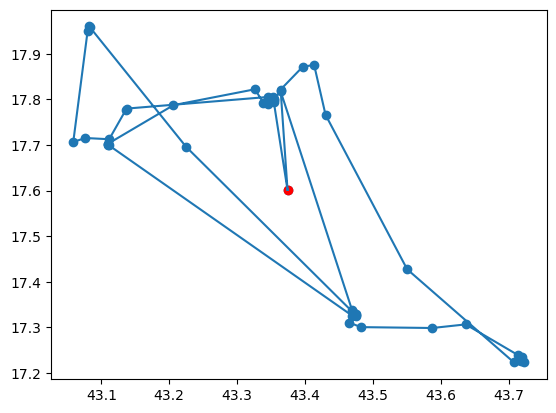

In [27]:
#new_cities_order = np.concatenate((np.array([Data.loc[best_solution[i]-1,['x','y']] for i in range(len(best_solution))]),np.array([Data.loc[n_clients,['x','y']]])))
# Plot the cities.
plt.scatter(Data['x'],Data['y'])
plt.scatter(*DEPOT, color='red', label='Dépôt')
# Plot the path.
X=[Data.loc[i-1,'x'] for i in best_solution]
Y=[Data.loc[i-1,'y'] for i in best_solution]
plt.plot(X,Y)
plt.show()

In [ ]:
A,best_solution,history=tabou(None,400)
plt.scatter(Data['x'],Data['y'])
plt.scatter(*DEPOT, color='red', label='Dépôt')
# Plot the path.
X=[Data.loc[i-1,'x'] for i in best_solution[0][0]]
Y=[Data.loc[i-1,'y'] for i in best_solution[0][0]]
plt.plot(X,Y)
X=[Data.loc[i-1,'x'] for i in best_solution[0][1]]
Y=[Data.loc[i-1,'y'] for i in best_solution[0][1]]
plt.plot(X,Y)
plt.show()

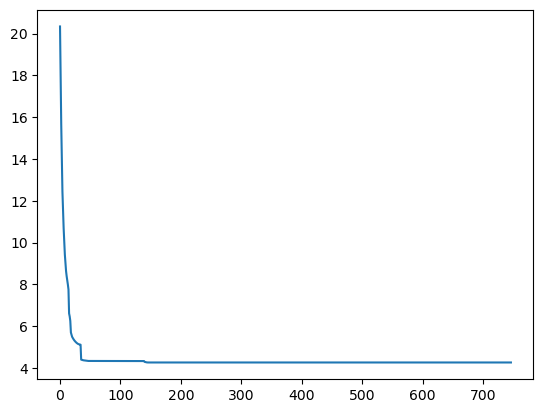

In [28]:
plt.plot(range(len(history)),history)

## Deux vehicules

In [14]:
nbmax = 200  # Nombre maximal d'itérations
f_limite = 0  # Borne inférieure de la fonction objectif
taille_max_T = 10  # Taille maximale de la liste taboue
C=5
def fonction_objectif( solution,M=U):
    fct=0
    L=solution
    nb_veh=len(L)
    for i in range(len(L)):
        if len(L[i])>1:
            for j in range(len(L[i])-1):
                fct+=U[L[i][j]-1,L[i][j+1]-1]
            fct +=C
    return fct

def generer_voisins2(solution,n_voisins=50):
    voisins = []
    n=len(solution)
    # Exemple : génération de voisins en inversant deux éléments de la solution
    m = len(solution[0])
    if len(solution[1])<len(solution[0]):
        m=len(solution[1])
        test=True
    for k in range(n_voisins):
        voisin0 = solution[0][:]
        voisin1=solution[1][:]
        l=random.sample(range(1,m-2),4)
        voisin0[l[0]], voisin0[l[1]], voisin0[l[2]], voisin0[l[3]]= voisin0[l[3]], voisin0[l[1]],voisin0[l[0]], voisin0[l[2]]
        voisin1[l[0]], voisin1[l[1]], voisin1[l[2]], voisin1[l[3]]= voisin1[l[3]], voisin1[l[1]],voisin1[l[0]], voisin1[l[2]]
        voisins.append([voisin0,voisin1])
    return voisins
def generer_voisins(solution,n_voisins=50):
    voisins = []
    n=len(solution)
    test=False
    m = len(solution[0])
    if len(solution[1])<len(solution[0]):
        m=len(solution[1])
        test=True
    voisins=[]    
    for i in range(1,m-2):
        for j in range(i+1,m-1):
            voisin0=solution[0][:]
            voisin1=solution[1][:]
            voisin0[i],voisin0[j]=voisin0[j],voisin0[i]
            voisin1[i],voisin1[j]=voisin1[j],voisin1[i]
            voisins.append([voisin0,voisin1])
    if test==False:
        for i in range(m-1,len(solution[1])-2):
            for j in range(i+1,len(solution[1])-1):
                voisin0=solution[0][:]
                voisin1=solution[1][:]
                voisin1[i],voisin1[j]=voisin1[j],voisin1[i]
                voisins.append([voisin0,voisin1])
    else:
        for i in range(m-1,len(solution[0])-2):
            for j in range(i+1,len(solution[0])-1):
                voisin0=solution[0][:]
                voisin1=solution[1][:]
                voisin0[i],voisin0[j]=voisin0[j],voisin0[i]
                voisins.append([voisin0,voisin1])
    return voisins
def fonction_aspiration(voisins,T,A):
    # Vérifier si la solution est taboue et satisfait l'aspiration
    sol=voisins[0][:]
    for solution in voisins[1:]:
        if (solution in T)  and (fonction_objectif(solution)<fonction_objectif(sol)):
            sol=solution[:]
    
    #T.remove(sol)
    return sol
def initialiser_solution(n=n_clients+1):
    nb_veh=random.randint(1,8)
    L=[[n] for _ in range(nb_veh)]
    aux=[i for i in range(1,n-1)]
    random.shuffle(aux)
    for i in range(nb_veh):
        if aux==[]:
            break
        S1=random.sample(aux,random.randint(4,len(aux)))
        aux=list(set(aux)-set(S1))
        L[i].extend(S1)
        L[i].append(n)
            
    return L,nb_veh
def initialiser_solutionv2(nb_veh=2,n=n_clients+1):
    L=[[n] for _ in range(nb_veh)]
    aux=[i for i in range(1,n-1)]
    random.shuffle(aux)
    S1=random.sample(aux,random.randint(10,len(aux))-2)
    aux=list(set(aux)-set(S1))
    L[0].extend(S1)
    L[0].append(n)
    L[1].extend(aux)
    L[1].append(n)        
    return L,nb_veh

def tabou( sol, nbmax):
    # Initialisation
    solution=sol
    if sol==None:
        solution,nb_veh = initialiser_solutionv2()
    meilleure_solution = solution[:]
    nb_iter = 0
    T = []  # Liste taboue initialement vide
    meilleure_iteration = 0
    f_limite = 50

    # Initialisation de la fonction d'aspiration
    A = fonction_objectif(meilleure_solution)
    T.append(solution)
    history=[A]
    # Processus itératif
    
    while (fonction_objectif(solution) > 16) and (nb_iter-meilleure_iteration < nbmax)  :
        
        nb_iter += 1
        
        voisins = generer_voisins(solution)
        if (nb_iter-meilleure_iteration) >=40:
            solution=min(T,key = lambda x:fonction_objectif(x))
            T.remove(solution)
            #print(fonction_objectif(solution))
            voisins = generer_voisins2(solution)
            
        meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))        
            
        # Mettre à jour la meilleure solution trouvée
        if (fonction_objectif(meilleure_voisin) < A) and (meilleure_voisin not in T):
            meilleure_solution = meilleure_voisin[:]
            meilleure_iteration = nb_iter
        T.append(meilleure_voisin)
        
            
        
        if len(T) > taille_max_T:
            T.pop(0)  # Supprimer le plus ancien élément de T
        # Mettre à jour la fonction d'aspiration
        A = fonction_objectif(meilleure_solution)
        # Mettre à jour la solution courante
        solution = meilleure_voisin[:]
        history.append(A)
    
  
    #print(A)
    return A,meilleure_solution,history


In [16]:
A,best_solution,history=tabou(None,600)
A

17.867338110304214

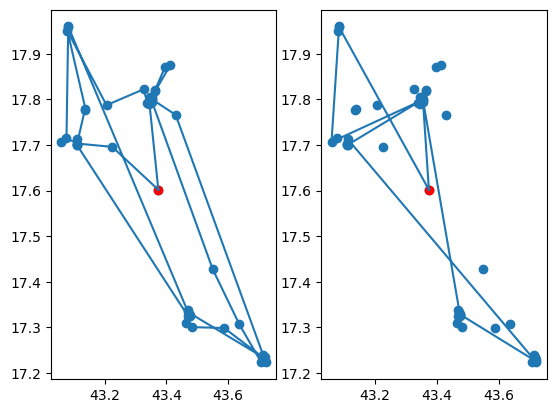

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.scatter(Data['x'],Data['y'])
ax1.scatter(*DEPOT, color='red', label='Dépôt')
ax2.scatter(Data['x'],Data['y'])
ax2.scatter(*DEPOT, color='red', label='Dépôt')
# Plot the path.
X=[Data.loc[i-1,'x'] for i in best_solution[0]]
Y=[Data.loc[i-1,'y'] for i in best_solution[0]]
ax1.plot(X,Y)
X=[Data.loc[i-1,'x'] for i in best_solution[1]]
Y=[Data.loc[i-1,'y'] for i in best_solution[1]]
ax2.plot(X,Y)
plt.show()

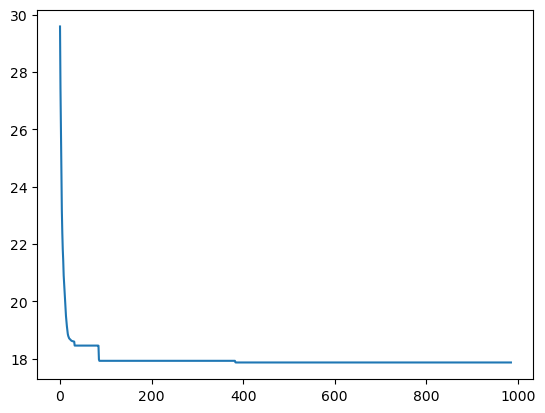

In [18]:
plt.plot(range(len(history)),history)

# SMA one vehicle

In [142]:
from mesa import Agent, Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector

def fonction_objectif( L,M=U):
    if L==None:
        return 100
    time=0
    V=30
    for i in range(len(L)-1):
        time+=U[L[i]-1,L[i+1]-1]
    return time
def generer_voisins(solution,n_voisins=100):
    voisins = []
    n=len(solution)
    """
    for k in range(n_voisins):
        voisin = solution[:]
        l=random.sample(range(1,n-2),4)
        voisin[l[0]], voisin[l[1]], voisin[l[2]], voisin[l[3]]= voisin[l[3]], voisin[l[1]],voisin[l[0]], voisin[l[2]]
        voisins.append(voisin)
    """
    for i in range(1,n-2):
        for j in range(i+1,n-1):
            voisin=solution[:]
            voisin[i],voisin[j]=voisin[j],voisin[i]
            voisins.append(voisin)
    return voisins

def initialiser_solution(n=n_clients+1):
    L=[n]
    aux=[i for i in range(1,n-1)]
    random.shuffle(aux)
    L.extend(aux)
    L.append(n)
    return L
class OptTabuAgent(Agent):
    def __init__(self, unique_id, model, collaboratif=False):
        super().__init__(unique_id, model)        
        self.sol = initialiser_solution()
        self.bestA=fonction_objectif(self.sol)
        self.collaboratif=collaboratif
        self.best_sol= self.sol[:]
        self.best_iter=0
        self.iter=0
        self.limit=40
        self.compt=100
        self.history=[self.bestA]
        self.T=[self.sol]
        self.taille_max_T=5
    '''
    si je suis collaboratif, j'entre en contact avec les autres
    je vérifie s'il y a mieux que moi, dans ce cas, je recupere le meilleur dans ma population
    '''
    def contact(self):
        min=self.bestA
        
        for a in self.model.schedule.agents:
            if a.bestA<min:
                min=a.bestA
                best_agent=a
                self.best_sol=a.sol
                self.bestA=min
                
    
    def step(self):
        self.iter+=1
        if(self.iter-self.best_iter>=100) :    
            if self.compt==100:
                #print('yes')
                self.solution=initialiser_solution()
            self.compt-=1
        
        if self.compt ==0:
            self.compt =100
        voisins = generer_voisins(self.sol)       
        meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))        
        while meilleure_voisin in self.T:
            voisins.remove(meilleure_voisin)
            meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))
            
        # Mettre à jour la meilleure solution trouvée
        if (fonction_objectif(meilleure_voisin) < self.bestA) and (meilleure_voisin not in self.T):
            self.best_sol = meilleure_voisin[:]
            self.bestA=fonction_objectif(meilleure_voisin)
        
        self.T.append(meilleure_voisin) 
        if len(self.T) > self.taille_max_T:
            self.T.pop(0)  # Supprimer le plus ancien élément de T
        # Mettre à jour la fonction d'aspiration
        A = fonction_objectif(self.best_sol)
        # Mettre à jour la solution courante
        self.sol = meilleure_voisin[:]
        self.history.append(A)
        
        if self.collaboratif==True:
            self.contact()
            
class OptimisationCollaborativeModel(Model):

    def __init__(self, NC=5,NNC=5):
        super().__init__()
        self.num_agents_collab = NC
        self.num_agents_ncollab =NNC
        self.flimite = float("inf")
        
        #The scheduler
        self.schedule = SimultaneousActivation(self)
        
        # Create agents
        for i in range(self.num_agents_ncollab):
            a = OptTabuAgent(i, self)
            self.schedule.add(a)
            
        for i in range(self.num_agents_ncollab,self.num_agents_collab+self.num_agents_ncollab):
            a = OptTabuAgent(i, self, True)
            self.schedule.add(a)            
        
        self.datacollector = DataCollector(
            agent_reporters={"Best Distance": lambda a:a.bestA, "Best route":lambda a:a.best_sol})


    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        
        

In [143]:
steps=100



model = OptimisationCollaborativeModel()

for i in range(steps):
    print(f"Step n{i+1}")
    model.step()  
    

agent_state = model.datacollector.get_agent_vars_dataframe()
print(agent_state)

Step n1
Step n2
Step n3
Step n4
Step n5
Step n6
Step n7
Step n8
Step n9
Step n10
Step n11
Step n12
Step n13
Step n14
Step n15
Step n16
Step n17
Step n18
Step n19
Step n20
Step n21
Step n22
Step n23
Step n24
Step n25
Step n26
Step n27
Step n28
Step n29
Step n30
Step n31
Step n32
Step n33
Step n34
Step n35
Step n36
Step n37
Step n38
Step n39
Step n40
Step n41
Step n42
Step n43
Step n44
Step n45
Step n46
Step n47
Step n48
Step n49
Step n50
Step n51
Step n52
Step n53
Step n54
Step n55
Step n56
Step n57
Step n58
Step n59
Step n60
Step n61
Step n62
Step n63
Step n64
Step n65
Step n66
Step n67
Step n68
Step n69
Step n70
Step n71
Step n72
Step n73
Step n74
Step n75
Step n76
Step n77
Step n78
Step n79
Step n80
Step n81
Step n82
Step n83
Step n84
Step n85
Step n86
Step n87
Step n88
Step n89
Step n90
Step n91
Step n92
Step n93
Step n94
Step n95
Step n96
Step n97
Step n98
Step n99
Step n100
              Best Distance                                         Best route
Step AgentID                 

In [144]:
df=agent_state['Best Distance']
df=df.unstack(level=-1)
df

AgentID,0,1,2,3,4,5,6,7,8,9
Step,,,,,,,,,,
0,21.599213,18.619717,18.862583,21.597878,19.739673,19.808577,22.839030,20.287250,19.787814,19.712496
1,18.625617,16.320758,16.133989,19.083743,17.071675,16.133989,16.133989,16.133989,16.133989,16.133989
2,16.348113,14.203222,14.087310,16.606309,14.992302,14.087310,14.087310,14.087310,14.087310,14.087310
3,14.526371,12.874951,12.089095,14.728716,13.182884,12.089095,12.089095,12.089095,12.089095,12.089095
4,13.018514,11.900609,10.752115,13.763968,11.910432,10.752115,10.752115,10.752115,10.752115,10.752115
...,...,...,...,...,...,...,...,...,...,...
95,7.300845,5.206581,4.663168,5.299932,5.464790,4.663168,4.663168,4.663168,4.663168,4.663168
96,7.300845,5.206581,4.663168,5.299932,5.464790,4.663168,4.663168,4.663168,4.663168,4.663168
97,7.300845,5.206581,4.663168,5.299932,5.464790,4.663168,4.663168,4.663168,4.663168,4.663168


<AxesSubplot:xlabel='Step'>

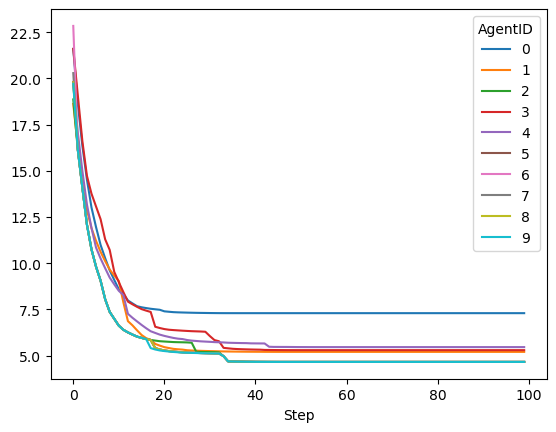

In [146]:
df.plot()

# SMA two vehicles

In [215]:
from mesa import Agent, Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector

def fonction_objectif( solution,M=U):
    fct=0
    L=solution
    nb_veh=len(L)
    for i in range(len(L)):
        if len(L[i])>1:
            for j in range(len(L[i])-1):
                fct+=U[L[i][j]-1,L[i][j+1]-1]
            fct +=C
    return fct
def initialiser_solution(nb_veh=2,n=n_clients+1):
    L=[[n] for _ in range(nb_veh)]
    aux=[i for i in range(1,n-1)]
    random.shuffle(aux)
    S1=random.sample(aux,random.randint(15,len(aux)-15))
    aux=list(set(aux)-set(S1))
    L[0].extend(S1)
    L[0].append(n)
    L[1].extend(aux)
    L[1].append(n)        
    return L
def generer_voisins(solution,n_voisins=50):
    voisins = []
    n=len(solution)
    test=False
    m = len(solution[0])
    if len(solution[1])<len(solution[0]):
        m=len(solution[1])
        test=True
    voisins=[]    
    for i in range(1,m-2):
        for j in range(i+1,m-1):
            voisin0=solution[0][:]
            voisin1=solution[1][:]
            voisin0[i],voisin0[j]=voisin0[j],voisin0[i]
            voisin1[i],voisin1[j]=voisin1[j],voisin1[i]
            voisins.append([voisin0,voisin1])
    if test==False:
        for i in range(m-1,len(solution[1])-2):
            for j in range(i+1,len(solution[1])-1):
                voisin0=solution[0][:]
                voisin1=solution[1][:]
                voisin1[i],voisin1[j]=voisin1[j],voisin1[i]
                voisins.append([voisin0,voisin1])
    else:
        for i in range(m-1,len(solution[0])-2):
            for j in range(i+1,len(solution[0])-1):
                voisin0=solution[0][:]
                voisin1=solution[1][:]
                voisin0[i],voisin0[j]=voisin0[j],voisin0[i]
                voisins.append([voisin0,voisin1])
    for k in range(n_voisins):
        voisin0 = solution[0][:]
        voisin1=solution[1][:]
        l=random.sample(range(1,m-2),4)
        aux1,aux2,aux3,aux4=voisin0[l[0]], voisin0[l[1]], voisin0[l[2]], voisin0[l[3]]
        voisin0[l[0]], voisin0[l[1]], voisin0[l[2]], voisin0[l[3]]= voisin1[l[0]], voisin1[l[1]], voisin1[l[2]], voisin1[l[3]]
        voisin1[l[0]], voisin1[l[1]], voisin1[l[2]], voisin1[l[3]]= aux1,aux2,aux3,aux4
        voisins.append([voisin0,voisin1])
    return voisins

class OptTabuAgent(Agent):
    def __init__(self, unique_id, model, collaboratif=False):
        super().__init__(unique_id, model)        
        self.sol = initialiser_solution()
        self.bestA=fonction_objectif(self.sol)
        self.collaboratif=collaboratif
        self.best_sol= self.sol[:]
        self.best_iter=0
        self.iter=0
        self.limit=40
        self.compt=100
        self.history=[self.bestA]
        self.T=[self.sol]
        self.taille_max_T=5
    '''
    si je suis collaboratif, j'entre en contact avec les autres
    je vérifie s'il y a mieux que moi, dans ce cas, je recupere le meilleur dans ma population
    '''
    def contact(self):
        min=self.bestA
        
        for a in self.model.schedule.agents:
            if a.bestA<min:
                min=a.bestA
                best_agent=a
                self.best_sol=a.sol
                self.bestA=min
                
    
    def step(self):
        self.iter+=1
        if(self.iter-self.best_iter>=100) :    
            if self.compt==100:
                #print('yes')
                self.solution=initialiser_solution()
            self.compt-=1
        
        if self.compt ==0:
            self.compt =100
        voisins = generer_voisins(self.sol)       
        meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))        
        while meilleure_voisin in self.T:
            voisins.remove(meilleure_voisin)
            meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))
            
        # Mettre à jour la meilleure solution trouvée
        if (fonction_objectif(meilleure_voisin) < self.bestA) and (meilleure_voisin not in self.T):
            self.best_sol = meilleure_voisin[:]
            self.bestA=fonction_objectif(meilleure_voisin)
        
        self.T.append(meilleure_voisin) 
        if len(self.T) > self.taille_max_T:
            self.T.pop(0)  # Supprimer le plus ancien élément de T
        # Mettre à jour la fonction d'aspiration
        A = fonction_objectif(self.best_sol)
        # Mettre à jour la solution courante
        self.sol = meilleure_voisin[:]
        self.history.append(A)
        
        if self.collaboratif==True:
            self.contact()

class OptimisationCollaborativeModel(Model):

    def __init__(self, NC=5,NNC=5):
        super().__init__()
        self.num_agents_collab = NC
        self.num_agents_ncollab =NNC
        self.flimite = float("inf")
        
        #The scheduler
        self.schedule = SimultaneousActivation(self)
        
        # Create agents
        for i in range(self.num_agents_ncollab):
            a = OptTabuAgent(i, self)
            self.schedule.add(a)
            
        for i in range(self.num_agents_ncollab,self.num_agents_collab+self.num_agents_ncollab):
            a = OptTabuAgent(i, self, True)
            self.schedule.add(a)            
        
        self.datacollector = DataCollector(
            agent_reporters={"Best Distance": lambda a:a.bestA, "Best route":lambda a:a.best_sol})


    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        

In [216]:
steps=200



model = OptimisationCollaborativeModel()

for i in range(steps):
    print(f"Step n{i+1}")
    model.step()  
    

agent_state = model.datacollector.get_agent_vars_dataframe()
print(agent_state)

Step n1
Step n2
Step n3
Step n4
Step n5
Step n6
Step n7
Step n8
Step n9
Step n10
Step n11
Step n12
Step n13
Step n14
Step n15
Step n16
Step n17
Step n18
Step n19
Step n20
Step n21
Step n22
Step n23
Step n24
Step n25
Step n26
Step n27
Step n28
Step n29
Step n30
Step n31
Step n32
Step n33
Step n34
Step n35
Step n36
Step n37
Step n38
Step n39
Step n40
Step n41
Step n42
Step n43
Step n44
Step n45
Step n46
Step n47
Step n48
Step n49
Step n50
Step n51
Step n52
Step n53
Step n54
Step n55
Step n56
Step n57
Step n58
Step n59
Step n60
Step n61
Step n62
Step n63
Step n64
Step n65
Step n66
Step n67
Step n68
Step n69
Step n70
Step n71
Step n72
Step n73
Step n74
Step n75
Step n76
Step n77
Step n78
Step n79
Step n80
Step n81
Step n82
Step n83
Step n84
Step n85
Step n86
Step n87
Step n88
Step n89
Step n90
Step n91
Step n92
Step n93
Step n94
Step n95
Step n96
Step n97
Step n98
Step n99
Step n100
Step n101
Step n102
Step n103
Step n104
Step n105
Step n106
Step n107
Step n108
Step n109
Step n110
Step n11

<AxesSubplot:xlabel='Step'>

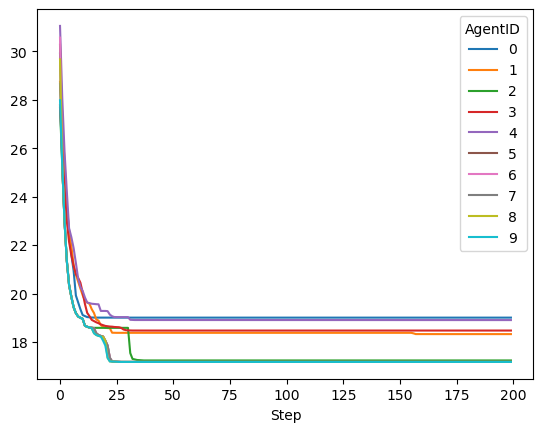

In [217]:
df=agent_state['Best Distance']
df=df.unstack(level=-1)
df.plot()

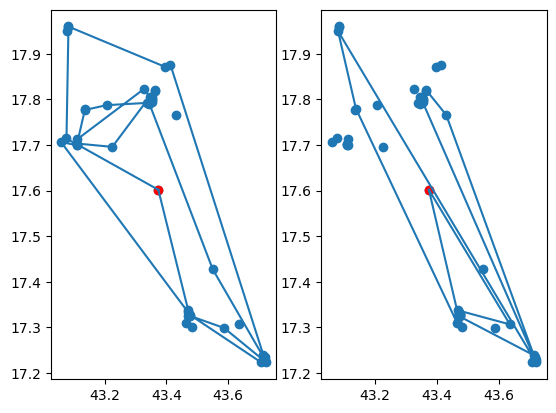

In [218]:
df1=agent_state['Best route'].unstack(level=-1)
best_solution=agent_state.loc[(99,0),'Best route']
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.scatter(Data['x'],Data['y'])
ax1.scatter(*DEPOT, color='red', label='Dépôt')
ax2.scatter(Data['x'],Data['y'])
ax2.scatter(*DEPOT, color='red', label='Dépôt')
# Plot the path.
X=[Data.loc[i-1,'x'] for i in best_solution[0]]
Y=[Data.loc[i-1,'y'] for i in best_solution[0]]
ax1.plot(X,Y)
X=[Data.loc[i-1,'x'] for i in best_solution[1]]
Y=[Data.loc[i-1,'y'] for i in best_solution[1]]
ax2.plot(X,Y)
plt.show()

# SMA multiple vehicles

In [219]:
from mesa import Agent, Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector

def fonction_objectif( solution,M=U):
    fct=0
    L=solution
    nb_veh=len(L)
    for i in range(len(L)):
        if len(L[i])>1:
            for j in range(len(L[i])-1):
                fct+=U[L[i][j]-1,L[i][j+1]-1]
            fct +=C
    return fct
def initialiser_solution(n=n_clients+1):
    nb_veh=random.randint(2,10)
    L=[]
    aux=[i for i in range(1,n-1)]
    random.shuffle(aux)
    i=0
    while(i<nb_veh) and (aux!=[]):
        if(len(aux)<=16):
            S1=random.sample(aux,len(aux))
            aux=[]
        else:
            S1=random.sample(aux,random.randint(8,len(aux)-8))
            aux=list(set(aux)-set(S1))
        L.append([n]+S1+[n])
        i+=1       
    if aux!=[]:
        L[i-1]=[n]+L[i-1][1:-1]+aux+[n]
    return L
def generer_voisins(solution,n_voisins=50):
    voisins = []
    n=len(solution)
    aux=[s for s in solution]
    voisins=[]  
    veh=random.randint(0,len(solution)-1)
    m=len(solution[veh])
    for i in range(1,m-2):
        for j in range(i+1,m-1):
            voisin0=solution[veh][:]
            voisin0[i],voisin0[j]=voisin0[j],voisin0[i]
            aux[veh]=voisin0
            voisins.append(aux)
    
    for k in range(n_voisins):
        v=random.sample(range(len(solution)),2)
        voisin0 = solution[v[0]][:]
        voisin1=solution[v[1]][:]
        m=min(len(voisin0),len(voisin1))
        l=random.sample(range(1,m-2),4)
        aux1,aux2,aux3,aux4=voisin0[l[0]], voisin0[l[1]], voisin0[l[2]], voisin0[l[3]]
        voisin0[l[0]], voisin0[l[1]], voisin0[l[2]], voisin0[l[3]]= voisin1[l[0]], voisin1[l[1]], voisin1[l[2]], voisin1[l[3]]
        voisin1[l[0]], voisin1[l[1]], voisin1[l[2]], voisin1[l[3]]= aux1,aux2,aux3,aux4
        aux=[s for s in solution]
        aux[v[0]]=voisin0
        aux[v[1]]=voisin1
        voisins.append(aux)
    return voisins

class OptTabuAgent(Agent):
    def __init__(self, unique_id, model, collaboratif=False):
        super().__init__(unique_id, model)        
        self.sol = initialiser_solution()
        self.nb_veh=len(self.sol)
        self.bestA=fonction_objectif(self.sol)
        self.collaboratif=collaboratif
        self.best_sol= self.sol[:]
        self.best_iter=0
        self.iter=0
        self.limit=40
        self.compt=100
        self.history=[self.bestA]
        self.T=[self.sol]
        self.taille_max_T=5
    '''
    si je suis collaboratif, j'entre en contact avec les autres
    je vérifie s'il y a mieux que moi, dans ce cas, je recupere le meilleur dans ma population
    '''
    def contact(self):
        min=self.bestA
        
        for a in self.model.schedule.agents:
            if a.bestA<min:
                min=a.bestA
                best_agent=a
                self.best_sol=a.sol
                self.nb_veh=len(self.best_sol)
                self.bestA=min
                
    
    def step(self):
        self.iter+=1
        if(self.iter-self.best_iter>=100) :    
            if self.compt==100:
                #print('yes')
                self.solution=initialiser_solution()
            self.compt-=1
        
        if self.compt ==0:
            self.compt =100
        voisins = generer_voisins(self.sol)       
        meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))        
        while meilleure_voisin in self.T:
            voisins.remove(meilleure_voisin)
            meilleure_voisin = min(voisins,key= lambda x:fonction_objectif(x))
            
        # Mettre à jour la meilleure solution trouvée
        if (fonction_objectif(meilleure_voisin) < self.bestA) and (meilleure_voisin not in self.T):
            self.best_sol = meilleure_voisin[:]
            self.nb_veh=len(self.best_sol)
            self.bestA=fonction_objectif(meilleure_voisin)
        
        self.T.append(meilleure_voisin) 
        if len(self.T) > self.taille_max_T:
            self.T.pop(0)  # Supprimer le plus ancien élément de T
        # Mettre à jour la fonction d'aspiration
        A = fonction_objectif(self.best_sol)
        # Mettre à jour la solution courante
        self.sol = meilleure_voisin[:]
        self.history.append(A)
        
        if self.collaboratif==True:
            self.contact()

class OptimisationCollaborativeModel(Model):

    def __init__(self, NC=5,NNC=5):
        super().__init__()
        self.num_agents_collab = NC
        self.num_agents_ncollab =NNC
        self.flimite = float("inf")
        
        #The scheduler
        self.schedule = SimultaneousActivation(self)
        
        # Create agents
        for i in range(self.num_agents_ncollab):
            a = OptTabuAgent(i, self)
            self.schedule.add(a)
            
        for i in range(self.num_agents_ncollab,self.num_agents_collab+self.num_agents_ncollab):
            a = OptTabuAgent(i, self, True)
            self.schedule.add(a)            
        
        self.datacollector = DataCollector(
            agent_reporters={"Best Distance": lambda a:a.bestA, "Best route":lambda a:a.best_sol})


    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        

In [220]:
steps=100



model = OptimisationCollaborativeModel()

for i in range(steps):
    print(f"Step n{i+1}")
    model.step()  
    

agent_state = model.datacollector.get_agent_vars_dataframe()
print(agent_state)

Step n1
Step n2
Step n3
Step n4
Step n5
Step n6
Step n7
Step n8
Step n9
Step n10
Step n11
Step n12
Step n13
Step n14
Step n15
Step n16
Step n17
Step n18
Step n19
Step n20
Step n21
Step n22
Step n23
Step n24
Step n25
Step n26
Step n27
Step n28
Step n29
Step n30
Step n31
Step n32
Step n33
Step n34
Step n35
Step n36
Step n37
Step n38
Step n39
Step n40
Step n41
Step n42
Step n43
Step n44
Step n45
Step n46
Step n47
Step n48
Step n49
Step n50
Step n51
Step n52
Step n53
Step n54
Step n55
Step n56
Step n57
Step n58
Step n59
Step n60
Step n61
Step n62
Step n63
Step n64
Step n65
Step n66
Step n67
Step n68
Step n69
Step n70
Step n71
Step n72
Step n73
Step n74
Step n75
Step n76
Step n77
Step n78
Step n79
Step n80
Step n81
Step n82
Step n83
Step n84
Step n85
Step n86
Step n87
Step n88
Step n89
Step n90
Step n91
Step n92
Step n93
Step n94
Step n95
Step n96
Step n97
Step n98
Step n99
Step n100
              Best Distance                                         Best route
Step AgentID                 

<AxesSubplot:xlabel='Step'>

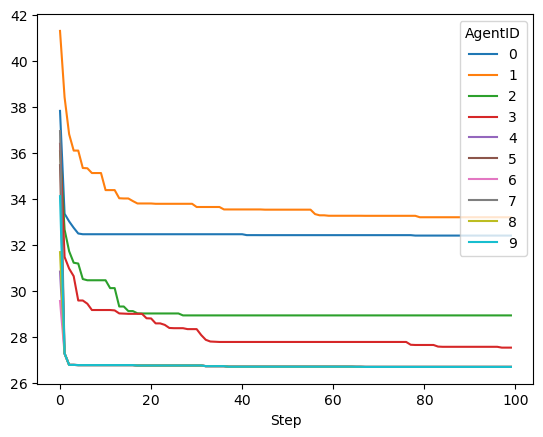

In [221]:
df=agent_state['Best Distance']
df=df.unstack(level=-1)
df.plot()

In [213]:
df1=agent_state['Best route'].unstack(level=-1)
best_solution=agent_state.loc[(99,1),'Best route']
nb_veh=len(best_solution)
nb_veh

2

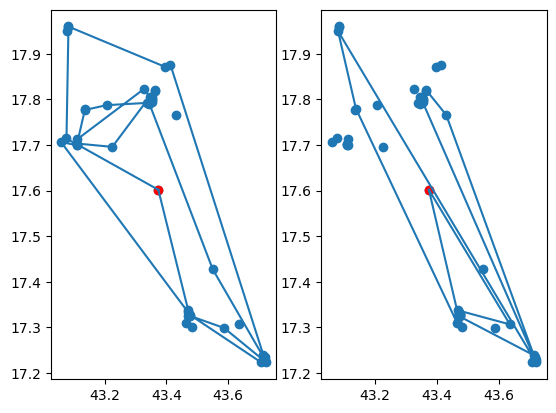

In [222]:

fig,(ax1,ax2)=plt.subplots(1,2)
ax1.scatter(Data['x'],Data['y'])
ax1.scatter(*DEPOT, color='red', label='Dépôt')
ax2.scatter(Data['x'],Data['y'])
ax2.scatter(*DEPOT, color='red', label='Dépôt')
# Plot the path.
X=[Data.loc[i-1,'x'] for i in best_solution[0]]
Y=[Data.loc[i-1,'y'] for i in best_solution[0]]
ax1.plot(X,Y)
X=[Data.loc[i-1,'x'] for i in best_solution[1]]
Y=[Data.loc[i-1,'y'] for i in best_solution[1]]
ax2.plot(X,Y)
plt.show()